# Plot changes per geomorphology

* **Products used:** [DE Africa Coastlines]()



### Load packages
Import Python packages that are used for the analysis.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt



In [2]:
# coastlines version, v0.4.0(-2022) or v0.4.2 (-2023)
version = 'v0.4.2'

In [3]:
change_geomorph  = gpd.read_file(f"../data/deafricacoastlines_{version}_geomorph_gadm.gpkg")
n_change_total = len(change_geomorph)

change_geomorph  = change_geomorph[change_geomorph.geomorph_dist<100]
print("Fraction of total with geomorphology", len(change_geomorph)/n_change_total)

Fraction of total with geomorphology 0.5957119804116665


In [41]:
change_geomorph  = change_geomorph[change_geomorph.Probs>0.5]
print("Fraction of total with geomorphology", len(change_geomorph)/n_change_total)

Fraction of total with geomorphology 0.5162797305287731


In [43]:
(change_geomorph.Preds == 'Beach').mean(), (change_geomorph.Preds == 'Wetland').mean(), (change_geomorph.Preds == 'Bedrock').mean()

(0.6147785428417529, 0.24809108806121266, 0.13713036909703447)

In [4]:
change_geomorph.head()

,index,uid,rate_time,sig_time,se_time,outl_time,dist_2000,dist_2001,dist_2002,dist_2003,...,Obs,Preds,Probs,geomorph_dist,GID_0,NAME_0,GID_1,NAME_1,GID_1_dist,geometry
360,514,sv0e5jrfyt,0.02,0.597,0.04,None,2.50,0.23,-0.38,-3.06,...,None,Bedrock,0.634478,10.697396,EGY,Egypt,EGY.22_1,Janub Sina',0.000000,POINT (3338028.908 3511712.885)
361,515,sv0e5m2h5b,-0.03,0.342,0.03,None,3.19,1.29,0.31,-0.20,...,None,Bedrock,0.634478,10.089536,EGY,Egypt,EGY.22_1,Janub Sina',0.000000,POINT (3338050.303 3511733.902)
362,516,sv0e5m2m13,-0.04,0.325,0.04,None,4.19,0.64,-0.50,0.28,...,None,Bedrock,0.634478,10.966925,EGY,Egypt,EGY.22_1,Janub Sina',4.026645,POINT (3338073.048 3511753.343)
363,517,sv0e5m2mzn,0.00,0.985,0.04,None,2.55,-0.62,-1.66,-0.91,...,None,Bedrock,0.634478,12.616363,EGY,Egypt,EGY.22_1,Janub Sina',0.000000,POINT (3338096.981 3511771.165)
364,518,sv0e5m2wux,0.03,0.558,0.04,None,2.44,-0.94,-1.27,-2.10,...,None,Bedrock,0.634478,12.160270,EGY,Egypt,EGY.22_1,Janub Sina',0.000000,POINT (3338119.474 3511790.933)


In [5]:
countries = change_geomorph.NAME_0.unique()
countries


array(['Egypt', None, 'Mozambique', 'Western Sahara', 'Mauritania',
       'Sudan', 'Eritrea', 'Tanzania', 'Kenya', 'Guinea-Bissau',
       'Somalia', 'Djibouti', 'Madagascar', 'Guinea', 'Morocco',
       'Sierra Leone', 'Liberia', "Côte d'Ivoire", 'Spain', 'Ghana',
       'Algeria', 'Togo', 'Benin', 'Nigeria', 'Senegal',
       'Equatorial Guinea', 'Tunisia', 'Cameroon', 'Gabon',
       'Republic of the Congo', 'Libya', 'Angola', 'Namibia',
       'Democratic Republic of the Congo', 'Gambia', 'South Africa'],
      dtype=object)

In [6]:
countries = [c for c in countries if str(c)!='nan' and (c!='Spain') and (c!=None)]

## Over all of Africa

In [22]:
beach = change_geomorph[(change_geomorph.Preds == 'Beach') & (change_geomorph.Probs > 0.5)]
bedrock = change_geomorph[(change_geomorph.Preds == 'Bedrock') & (change_geomorph.Probs > 0.5)]
wetland = change_geomorph[(change_geomorph.Preds == 'Wetland') & (change_geomorph.Probs > 0.5)]

beach_sig = beach[beach.sig_time<0.01]
bedrock_sig = bedrock[bedrock.sig_time<0.01]
wetland_sig = wetland[wetland.sig_time<0.01]

change_sig = change_geomorph[change_geomorph.sig_time<0.01]

In [23]:
sig_change = change_geomorph[change_geomorph.sig_time<0.01]
print("Total negative change (km)", len(sig_change[sig_change.rate_time<0])*30./1000)
print("Total positive change (km)", len(sig_change[sig_change.rate_time>0])*30./1000)

#Beach
print("Beach negative change (km)", len(beach_sig[beach_sig.rate_time<0])*30./1000)
print("Beach positive change (km)", len(beach_sig[beach_sig.rate_time>0])*30./1000)

#Wetland
print("Wetland negative change (km)", len(wetland_sig[wetland_sig.rate_time<0])*30./1000)
print("Wetland positive change (km)", len(wetland_sig[wetland_sig.rate_time>0])*30./1000)

Total negative change (km) 6909.3
Total positive change (km) 6746.49
Beach negative change (km) 4167.84
Beach positive change (km) 3313.2
Wetland negative change (km) 1451.94
Wetland positive change (km) 1735.95


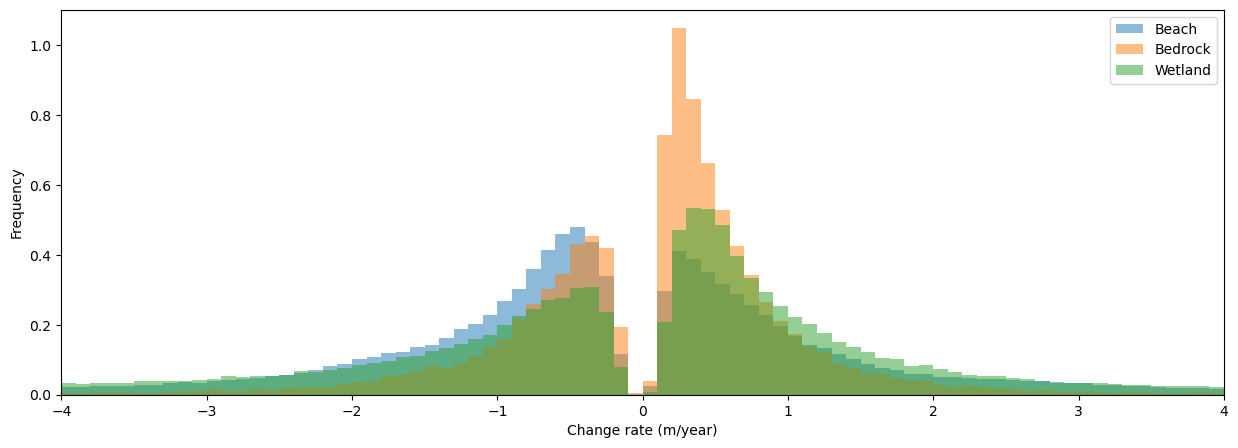

In [24]:
bins = np.arange(-4,4.1,0.1)
beach_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Beach', legend=True, figsize=(15,5), density=True);
bedrock_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Bedrock', legend=True, density=True);
wetland_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Wetland', legend=True, density=True);
plt.xlim((bins[0], bins[-1]));
plt.xlabel('Change rate (m/year)');
#plt.savefig(f"../figure/Rate_of_change_geomorphogy_all.png", bbox_inches='tight')

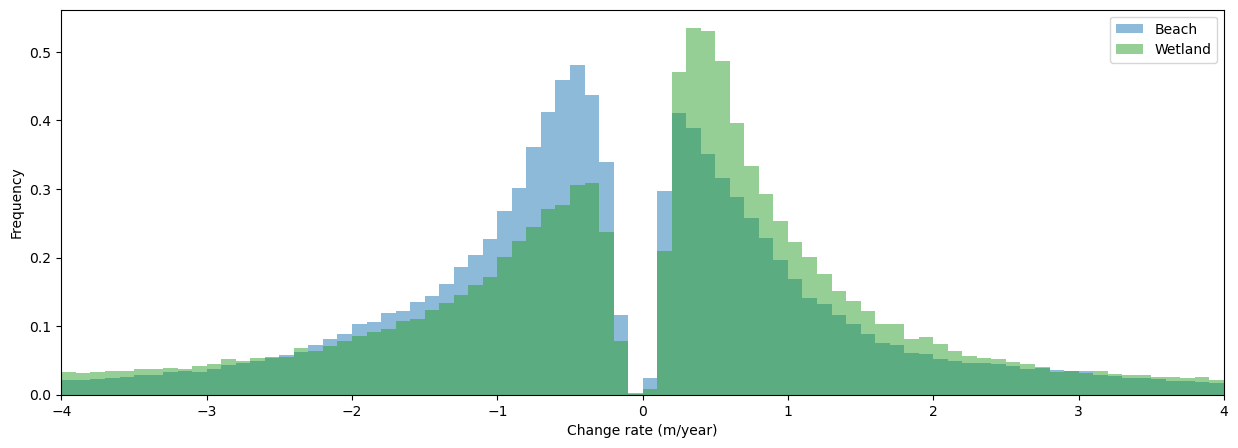

In [25]:
bins = np.arange(-4,4.1,0.1)
beach_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Beach', legend=True, figsize=(15,5), density=True, color='#1f77b4');
wetland_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Wetland', legend=True, density=True, color='#2ca02c');
#change_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='All coastlines', legend=True, histtype='step', density=True, color='#ff7f0e');
plt.xlim((bins[0], bins[-1]));
plt.xlabel('Change rate (m/year)');
#plt.savefig(f"../figure/Rate_of_change_geomorphogy_beach_wetland_density.png", bbox_inches='tight')

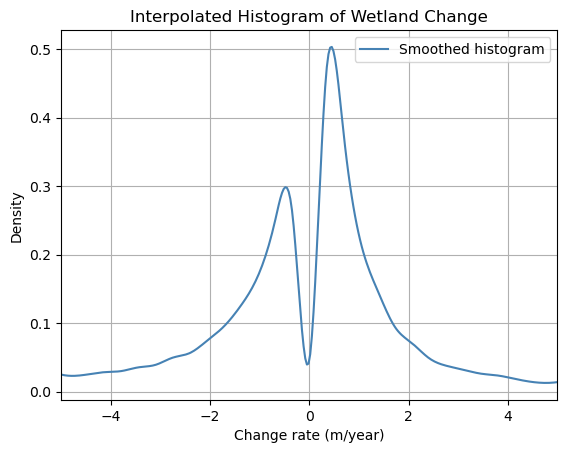

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

data = wetland_sig.rate_time.dropna()
bins = np.linspace(-5, 5, 30)  # bin edges
counts, bin_edges = np.histogram(data, bins=bins, density=True)

# Get bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit a spline to the histogram
spline = make_interp_spline(bin_centers, counts, k=3)  # Cubic spline

# Dense x for smooth plot
x_dense = np.linspace(-5, 5, 300)
y_smooth = spline(x_dense)

# Plot
plt.plot(x_dense, y_smooth, label="Smoothed histogram", color='steelblue')
plt.xlabel("Change rate (m/year)")
plt.ylabel("Density")
plt.title("Interpolated Histogram of Wetland Change")
plt.grid(True)
plt.xlim(-5, 5)
plt.legend()
plt.show()


Text(0, 0.5, 'Number of measurements')

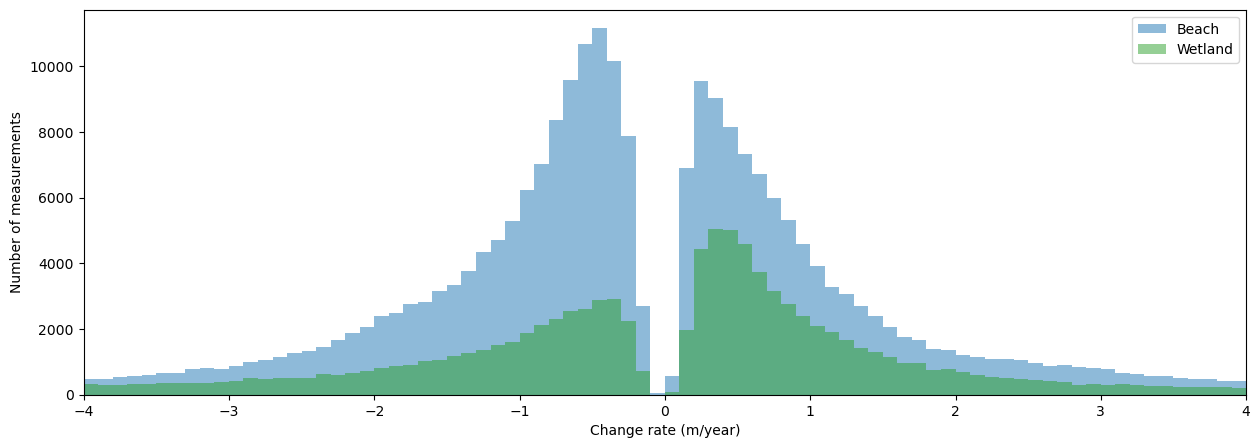

In [27]:
bins = np.arange(-4,4.1,0.1)
beach_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Beach', legend=True, figsize=(15,5), density=False, color='#1f77b4');
wetland_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Wetland', legend=True, density=False, color='#2ca02c');
#change_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='All coastlines', legend=True, histtype='step', density=True, color='#ff7f0e');
plt.xlim((bins[0], bins[-1]));
plt.xlabel('Change rate (m/year)');
plt.ylabel('Number of measurements')
#plt.savefig(f"../figure/Rate_of_change_geomorphogy_beach_wetland.png", bbox_inches='tight')

Text(0, 0.5, 'Cumulative distribution')

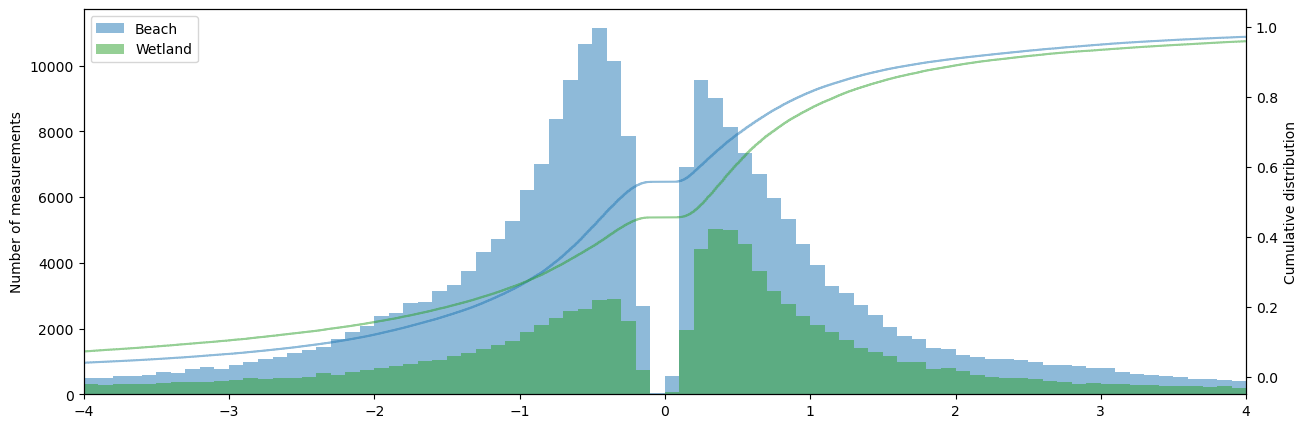

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 5))

bins = np.arange(-4,4.1,0.1)
beach_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Beach', legend=True, figsize=(15,5), density=False, color='#1f77b4', ax=ax1);
wetland_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Wetland', legend=True, density=False, color='#2ca02c', ax=ax1);

# Second axis (shares x-axis)
ax2 = ax1.twinx()
sorted_data = np.sort(beach_sig.rate_time)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
# Plot cumulative distribution as a line
ax2.plot(sorted_data, cdf, label='Beach', color='#1f77b4',alpha=0.5)

sorted_data = np.sort(wetland_sig.rate_time)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
# Plot cumulative distribution as a line
ax2.plot(sorted_data, cdf, label='Wetland', color='#2ca02c',alpha=0.5)

ax1.legend(loc='upper left')
plt.xlim((bins[0], bins[-1]));
plt.xlabel('Change rate (m/year)');
ax1.set_ylabel('Number of measurements')
ax2.set_ylabel('Cumulative distribution')
#plt.savefig(f"../figure/Rate_of_change_geomorphogy_beach_wetland_with_cumulative.png", bbox_inches='tight')

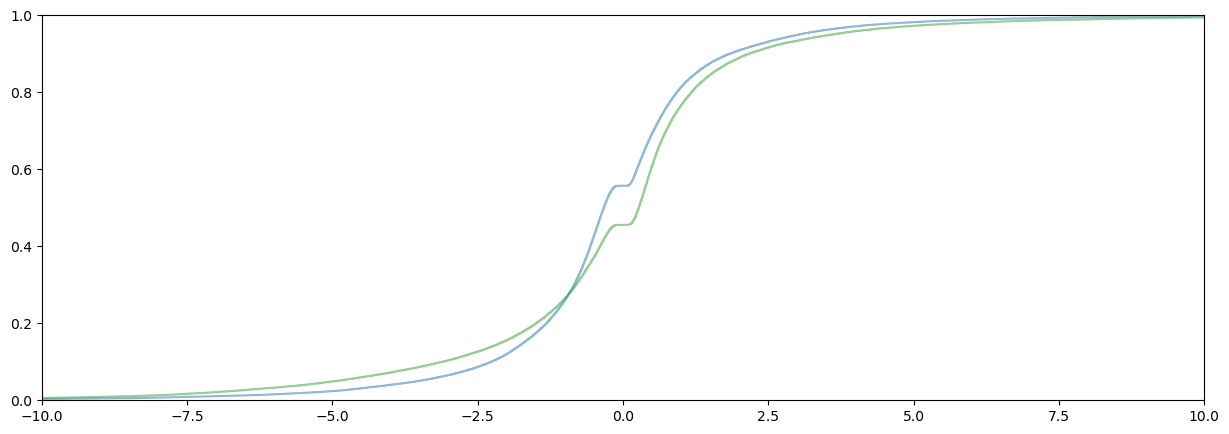

In [29]:
plt.figure(figsize=(15,5))
    
sorted_data = np.sort(beach_sig.rate_time)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
# Plot cumulative distribution as a line
plt.plot(sorted_data, cdf, label='Beach', color='#1f77b4',alpha=0.5)

sorted_data = np.sort(wetland_sig.rate_time)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
# Plot cumulative distribution as a line
plt.plot(sorted_data, cdf, label='Wetland', color='#2ca02c',alpha=0.5)


plt.xlim((-10,10));
plt.ylim((0,1));


## Per country

In [30]:
# country stats

countries_summary = pd.DataFrame(countries, columns=["Country"])
countries_summary[['total_beach_km', 'total_wetland_km',
                   'beach_pos_km', 'beach_neg_km',
                   'wetland_pos_km', 'wetland_neg_km',
                   'beach_pos_perc', 'beach_neg_perc',
                   'wetland_pos_perc', 'wetland_neg_perc',
                   ]] = [np.nan]*10

for idx in countries_summary.index:
    good_rates = change_geomorph[change_geomorph[f"NAME_0"]==countries_summary.loc[idx][f"Country"]]
    if len(good_rates)==0:
        print("no data over", countries_summary.loc[idx][f"Country"])
        continue

    beach_country = good_rates[(good_rates.Preds == 'Beach') & (good_rates.Probs > 0.5) & (good_rates.geomorph_dist<100)]
    wetland_country = good_rates[(good_rates.Preds == 'Wetland') & (good_rates.Probs > 0.5) & (good_rates.geomorph_dist<100)]

    total_beach_km = len(beach_country)*30/1000
    total_wetland_km = len(wetland_country)*30/1000
    
    beach_neg_km = len(beach_country[(beach_country.sig_time<0.01) & (beach_country.rate_time<0)])*30/1000
    beach_pos_km = len(beach_country[(beach_country.sig_time<0.01) & (beach_country.rate_time>0)])*30/1000
    wetland_neg_km = len(wetland_country[(wetland_country.sig_time<0.01) & (wetland_country.rate_time<0)])*30/1000
    wetland_pos_km = len(wetland_country[(wetland_country.sig_time<0.01) & (wetland_country.rate_time>0)])*30/1000

    beach_pos_perc = beach_pos_km/total_beach_km
    beach_neg_perc = beach_neg_km/total_beach_km

    wetland_neg_perc = wetland_neg_km/total_wetland_km
    wetland_pos_perc = wetland_pos_km/total_wetland_km

    for cname in ['total_beach_km', 'total_wetland_km',
                   'beach_pos_km', 'beach_neg_km',
                   'wetland_pos_km', 'wetland_neg_km',
                   'beach_pos_perc', 'beach_neg_perc',
                   'wetland_pos_perc', 'wetland_neg_perc',
                   ]:
        countries_summary.at[idx, cname] = eval(cname)



In [31]:
countries_summary.sort_values('total_beach_km',ascending=False).iloc[:10]

,Country,total_beach_km,total_wetland_km,beach_pos_km,beach_neg_km,wetland_pos_km,wetland_neg_km,beach_pos_perc,beach_neg_perc,wetland_pos_perc,wetland_neg_perc
9,Somalia,2338.14,66.93,450.03,392.64,12.57,9.90,0.192474,0.167928,0.187808,0.147916
11,Madagascar,1817.07,731.10,301.59,395.28,150.27,173.88,0.165976,0.217537,0.205540,0.237833
1,Mozambique,1305.21,887.85,219.27,418.71,277.50,199.20,0.167996,0.320799,0.312553,0.224362
28,Libya,1166.01,135.57,160.47,309.75,33.09,22.17,0.137623,0.265650,0.244081,0.163532
30,Namibia,1142.49,28.68,175.86,319.68,8.67,7.50,0.153927,0.279810,0.302301,0.261506
0,Egypt,1141.26,94.20,271.38,272.97,27.57,12.66,0.237790,0.239183,0.292675,0.134395
29,Angola,944.22,60.93,163.41,323.76,19.23,7.77,0.173063,0.342886,0.315608,0.127523
33,South Africa,907.71,117.84,112.29,180.81,26.61,8.10,0.123707,0.199194,0.225815,0.068737
13,Morocco,756.96,94.59,117.15,105.09,32.58,4.80,0.154764,0.138832,0.344434,0.050745
2,Western Sahara,732.54,26.46,52.71,114.96,4.77,6.00,0.071955,0.156933,0.180272,0.226757


Somalia: 393km receding, 450km advancing
Madagascar: 395km receding, 302km advancing
Mozambique: 419km receding, 219km advancing
Libya: 310km receding, 160km advancing
Namibia: 320km receding, 176km advancing


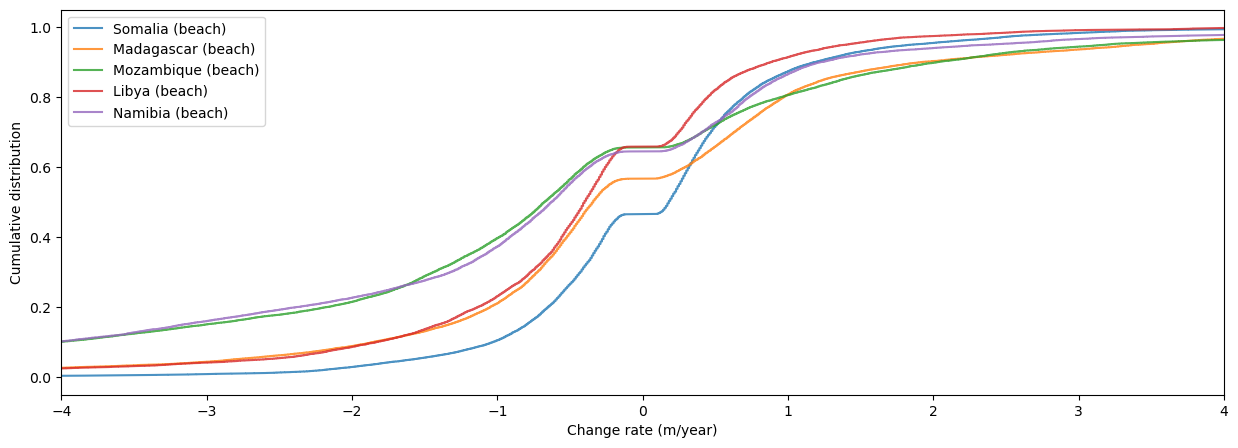

In [32]:
# Beach change
plt.figure(figsize=(15,5))

for country in list(countries_summary.sort_values('total_beach_km',ascending=False).iloc[:5].Country):
    beach_country = change_geomorph[(change_geomorph.Preds == 'Beach') & (change_geomorph.Probs > 0.5) & (change_geomorph[f"NAME_0"]==country)]

    if len(beach_country) ==0:
        print("no data over", country)
        continue

    beach_sig_country = beach_country[beach_country.sig_time<0.01]

    neg_km = len(beach_sig_country[beach_sig_country.rate_time<0])*30./1000
    pos_km = len(beach_sig_country[beach_sig_country.rate_time>0])*30./1000

    sorted_data = np.sort(beach_sig_country.rate_time)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Plot cumulative distribution as a line
    plt.plot(sorted_data, cdf, label=f"{country} (beach)", alpha=0.8)
    print(f"{country}: {neg_km:.0f}km receding, {pos_km:.0f}km advancing")
    

plt.legend()
plt.xlim((-4,4));
#plt.ylim((0,1));
plt.xlabel('Change rate (m/year)');
plt.ylabel('Cumulative distribution');

In [33]:
countries_summary.sort_values('total_wetland_km',ascending=False).iloc[:10]

,Country,total_beach_km,total_wetland_km,beach_pos_km,beach_neg_km,wetland_pos_km,wetland_neg_km,beach_pos_perc,beach_neg_perc,wetland_pos_perc,wetland_neg_perc
1,Mozambique,1305.21,887.85,219.27,418.71,277.50,199.20,0.167996,0.320799,0.312553,0.224362
11,Madagascar,1817.07,731.10,301.59,395.28,150.27,173.88,0.165976,0.217537,0.205540,0.237833
8,Guinea-Bissau,134.82,721.98,30.09,40.98,120.00,131.43,0.223186,0.303961,0.166210,0.182041
21,Nigeria,250.17,593.40,82.50,85.44,79.74,173.61,0.329776,0.341528,0.134378,0.292568
14,Sierra Leone,213.45,486.24,83.07,48.69,97.11,131.43,0.389178,0.228110,0.199716,0.270299
6,Tanzania,134.91,411.12,30.87,23.10,180.21,30.12,0.228819,0.171225,0.438339,0.073263
12,Guinea,64.02,402.45,14.79,17.22,81.72,144.96,0.231022,0.268978,0.203056,0.360194
4,Sudan,304.38,316.26,130.50,25.11,67.35,57.87,0.428740,0.082496,0.212958,0.182982
24,Tunisia,611.94,285.30,112.02,186.78,41.94,78.93,0.183057,0.305226,0.147003,0.276656
25,Cameroon,11.88,268.62,8.37,0.06,67.38,50.46,0.704545,0.005051,0.250838,0.187849


Mozambique: 199km receding, 278km advancing
Madagascar: 174km receding, 150km advancing
Guinea-Bissau: 131km receding, 120km advancing
Nigeria: 174km receding, 80km advancing
Sierra Leone: 131km receding, 97km advancing


Text(0, 0.5, 'Cumulative distribution')

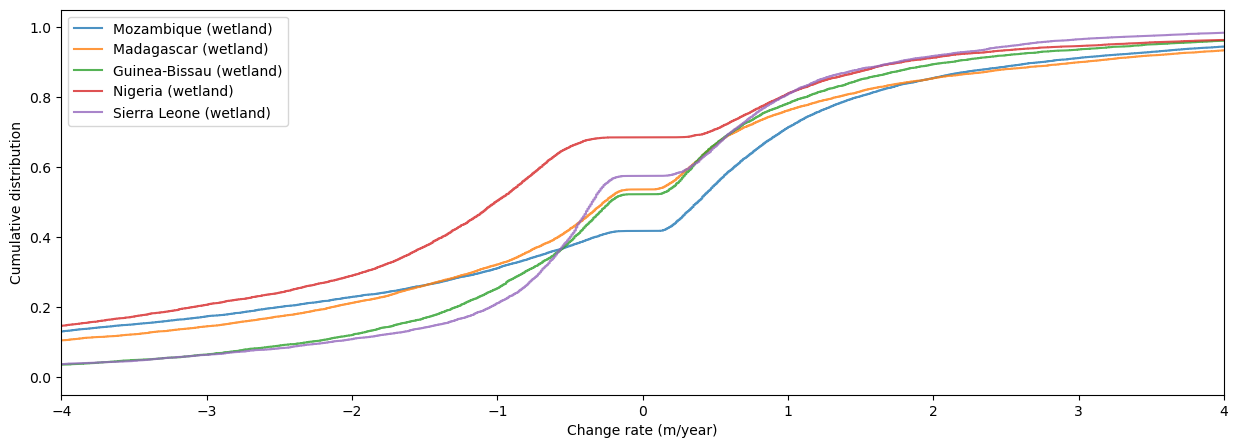

In [34]:
# Wetland
plt.figure(figsize=(15,5))

for country in list(countries_summary.sort_values('total_wetland_km',ascending=False).iloc[:5].Country):
    wetland_country= change_geomorph[(change_geomorph.Preds == 'Wetland') & (change_geomorph.Probs > 0.5) & (change_geomorph[f"NAME_0"]==country)]

    if len(wetland_country) ==0:
        print("no data over", country)
        continue

    wetland_sig_country = wetland_country[wetland_country.sig_time<0.01]

    neg_km = len(wetland_sig_country[wetland_sig_country.rate_time<0])*30./1000
    pos_km = len(wetland_sig_country[wetland_sig_country.rate_time>0])*30./1000

    sorted_data = np.sort(wetland_sig_country.rate_time)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Plot cumulative distribution as a line
    plt.plot(sorted_data, cdf, label=f"{country} (wetland)", alpha=0.8)
    print(f"{country}: {neg_km:.0f}km receding, {pos_km:.0f}km advancing")

    
plt.legend()
plt.xlim((-4,4));
#plt.ylim((0,1));
plt.xlabel('Change rate (m/year)');
plt.ylabel('Cumulative distribution')

Somalia (beach): 393km receding, 450km advancing
Madagascar (beach): 395km receding, 302km advancing
Mozambique (beach): 419km receding, 219km advancing
Libya (beach): 310km receding, 160km advancing
Namibia (beach): 320km receding, 176km advancing
Mozambique (wetland): 199km receding, 278km advancing
Madagascar (wetland): 174km receding, 150km advancing
Guinea-Bissau (wetland): 131km receding, 120km advancing
Nigeria (wetland): 174km receding, 80km advancing
Sierra Leone (wetland): 131km receding, 97km advancing


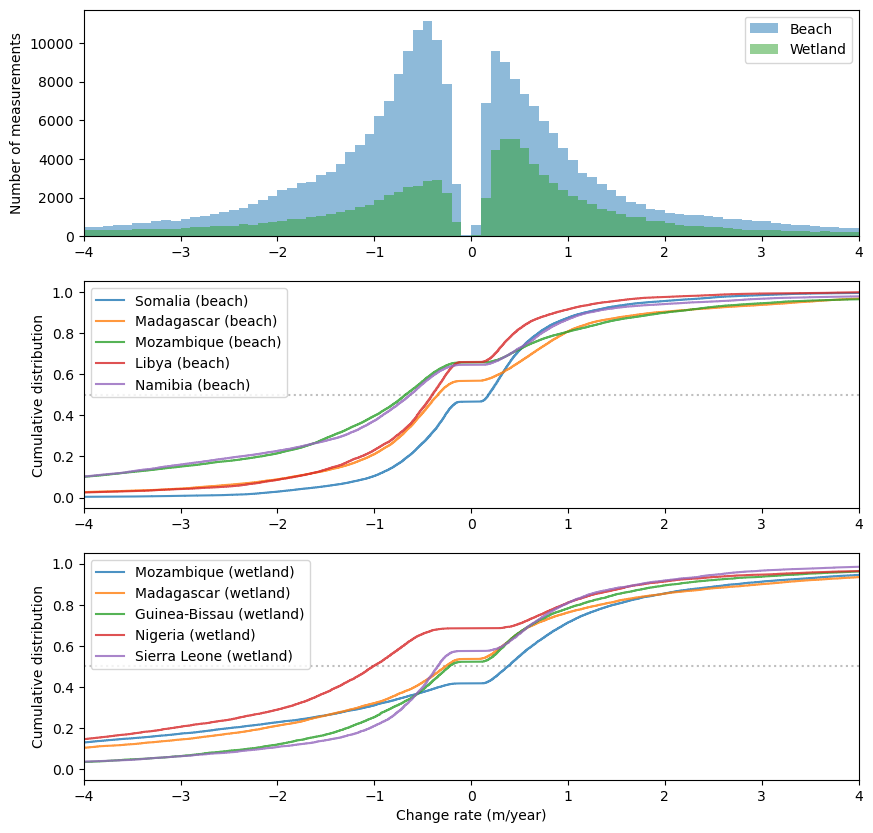

In [35]:
# Create subplots with shared x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(10, 10))

bins = np.arange(-4,4.1,0.1)
beach_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Beach', legend=True, density=False, color='#1f77b4', ax=ax1);
wetland_sig.rate_time.plot.hist(alpha=0.5, bins=bins, label='Wetland', legend=True, density=False, color='#2ca02c', ax=ax1);
ax1.set_xlim((bins[0], bins[-1]));
ax1.set_ylabel('Number of measurements')
#ax1.set_xlabel('Change rate (m/year)');

ax2.axhline(0.5, alpha=0.5, color='gray', linestyle=':')
for country in list(countries_summary.sort_values('total_beach_km',ascending=False).iloc[:5].Country):
    beach_country = change_geomorph[(change_geomorph.Preds == 'Beach') & (change_geomorph.Probs > 0.5) & (change_geomorph[f"NAME_0"]==country)]

    if len(beach_country) ==0:
        print("no data over", country)
        continue

    beach_sig_country = beach_country[beach_country.sig_time<0.01]

    neg_km = len(beach_sig_country[beach_sig_country.rate_time<0])*30./1000
    pos_km = len(beach_sig_country[beach_sig_country.rate_time>0])*30./1000

    sorted_data = np.sort(beach_sig_country.rate_time)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Plot cumulative distribution as a line
    ax2.plot(sorted_data, cdf, label=f"{country} (beach)", alpha=0.8)
    print(f"{country} (beach): {neg_km:.0f}km receding, {pos_km:.0f}km advancing")
ax2.legend()
ax2.set_xlim((bins[0], bins[-1]));
ax2.set_ylabel('Cumulative distribution')
#ax2.set_xlabel('Change rate (m/year)');

ax3.axhline(0.5, alpha=0.5, color='gray', linestyle=':')
for country in list(countries_summary.sort_values('total_wetland_km',ascending=False).iloc[:5].Country):
    wetland_country= change_geomorph[(change_geomorph.Preds == 'Wetland') & (change_geomorph.Probs > 0.5) & (change_geomorph[f"NAME_0"]==country)]

    if len(wetland_country) ==0:
        print("no data over", country)
        continue

    wetland_sig_country = wetland_country[wetland_country.sig_time<0.01]

    neg_km = len(wetland_sig_country[wetland_sig_country.rate_time<0])*30./1000
    pos_km = len(wetland_sig_country[wetland_sig_country.rate_time>0])*30./1000

    sorted_data = np.sort(wetland_sig_country.rate_time)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Plot cumulative distribution as a line
    ax3.plot(sorted_data, cdf, label=f"{country} (wetland)", alpha=0.8)
    print(f"{country} (wetland): {neg_km:.0f}km receding, {pos_km:.0f}km advancing")
ax3.legend()
ax3.set_xlim((bins[0], bins[-1]));
ax3.set_ylabel('Cumulative distribution')
ax3.set_xlabel('Change rate (m/year)');

plt.xlim((bins[0], bins[-1]));
#plt.xlabel('Shoreline change rate (m/year)');
plt.savefig(f"../figure/Rate_of_change_geomorphogy_beach_wetland_top_countries.png", bbox_inches='tight')